# Import Lib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import plotly.express as px
import missingno as msno

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV, Lasso
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Load

In [2]:
train_df = pd.read_json('../data/train.json')
test_df = pd.read_json('../data/test.json')

# EDA

In [3]:
print(train_df.shape)
train_df.head()

(14271, 23)


,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price
0,8448321,Bangkok,Watthana,Phra Khanong Nuea,"36 Soi Sukhumvit 63, Ekamai Road",Condo,273.0,2.0,2.0,66,...,100.584850,2,"[[E7 Ekkamai BTS, 270], [E6 Thong Lo BTS, 800]]",NaN,16.0,20,2011,June,"[Car Park, Community Garden, CCTV, Fitness cor...",8500000
1,10936325,Bangkok,Watthana,Khlong Toei Nuea,31 สุขุมวิท,Condo,74.0,1.0,1.0,49,...,100.566949,3,"[[BL22 Sukhumvit MRT, 720], [BL21 Phetchaburi ...",NaN,11.0,20,2012,September,"[CCTV, Fitness corner, 24 hours security, Swim...",5900000
2,10927931,Bangkok,Khlong Toei,Khlong Tan,"68 Sukhumvit 24 Alley, Khong Tan",Condo,940.0,1.0,1.0,34,...,100.565660,2,"[[E5 Phrom Phong BTS, 650], [BL23 Queen Siriki...",NaN,20.0,20,2017,January,"[Car Park, Clubhouse, Community Garden, CCTV, ...",6290000
3,11004792,Nonthaburi,Bang Kruai,Bang Khun Kong,Bang Khun Kong,Detached House,NaN,3.0,3.0,170,...,100.428438,0,None,NaN,2.0,4,0,None,"[Covered car park, Playground, 24 hours securi...",8900000
4,10757452,Nonthaburi,Mueang Nonthaburi,Bang Phai,พระราม5-นครอินทร์,Townhouse,NaN,3.0,2.0,120,...,100.494129,1,"[[PP09 Yaek Nonthaburi 1 MRT, 10]]",NaN,6.0,15,0,None,"[Covered car park, 24 hours security]",2390000


In [4]:
print(test_df.shape)
test_df.head()

(2500, 22)


,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,latitude,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities
0,10317868,Samut Prakan,Bang Phli,Bang Phli Yai,Nam Daeng Road Yai,Detached House,800.0,4.0,3.0,120,...,13.614196,100.680610,0,None,NaN,9.0,5,0,None,"[Clubhouse, Community Garden, CCTV, Pavillion,..."
1,10885829,Bangkok,Nong Khaem,Nong Khang Phlu,Machareon Road,Detached House,107.0,4.0,3.0,188,...,13.702222,100.341833,0,None,20.0,9.0,5,2020,None,"[Car Park, Clubhouse, Community Garden, CCTV, ..."
2,10765951,Bangkok,Huai Khwang,Huai Khwang,72 Rama 9,Condo,433.0,1.0,1.0,22,...,13.755713,100.566385,3,"[[BL20 Phra Ram 9 MRT, 270], [E4 Asok BTS, 780...",NaN,13.0,20,2015,September,"[Covered car park, CCTV, Fitness corner, 24 ho..."
3,10003549,Bangkok,Khlong Toei,Khlong Tan,"772 Sukhumvit Road, Khong Tan",Condo,656.0,1.0,1.0,41,...,13.724295,100.577202,1,"[[E6 Thong Lo BTS, 70]]",20.0,16.0,20,2013,June,"[Car Park, Covered car park, CCTV, Fitness cor..."
4,10663026,Bangkok,Lak Si,Thung Song Hong,222 Ngamwongwan Road,Condo,1458.0,1.0,1.0,29,...,13.855437,100.547923,0,None,20.0,10.0,14,2012,September,"[Covered car park, CCTV, Fitness corner, 24 ho..."


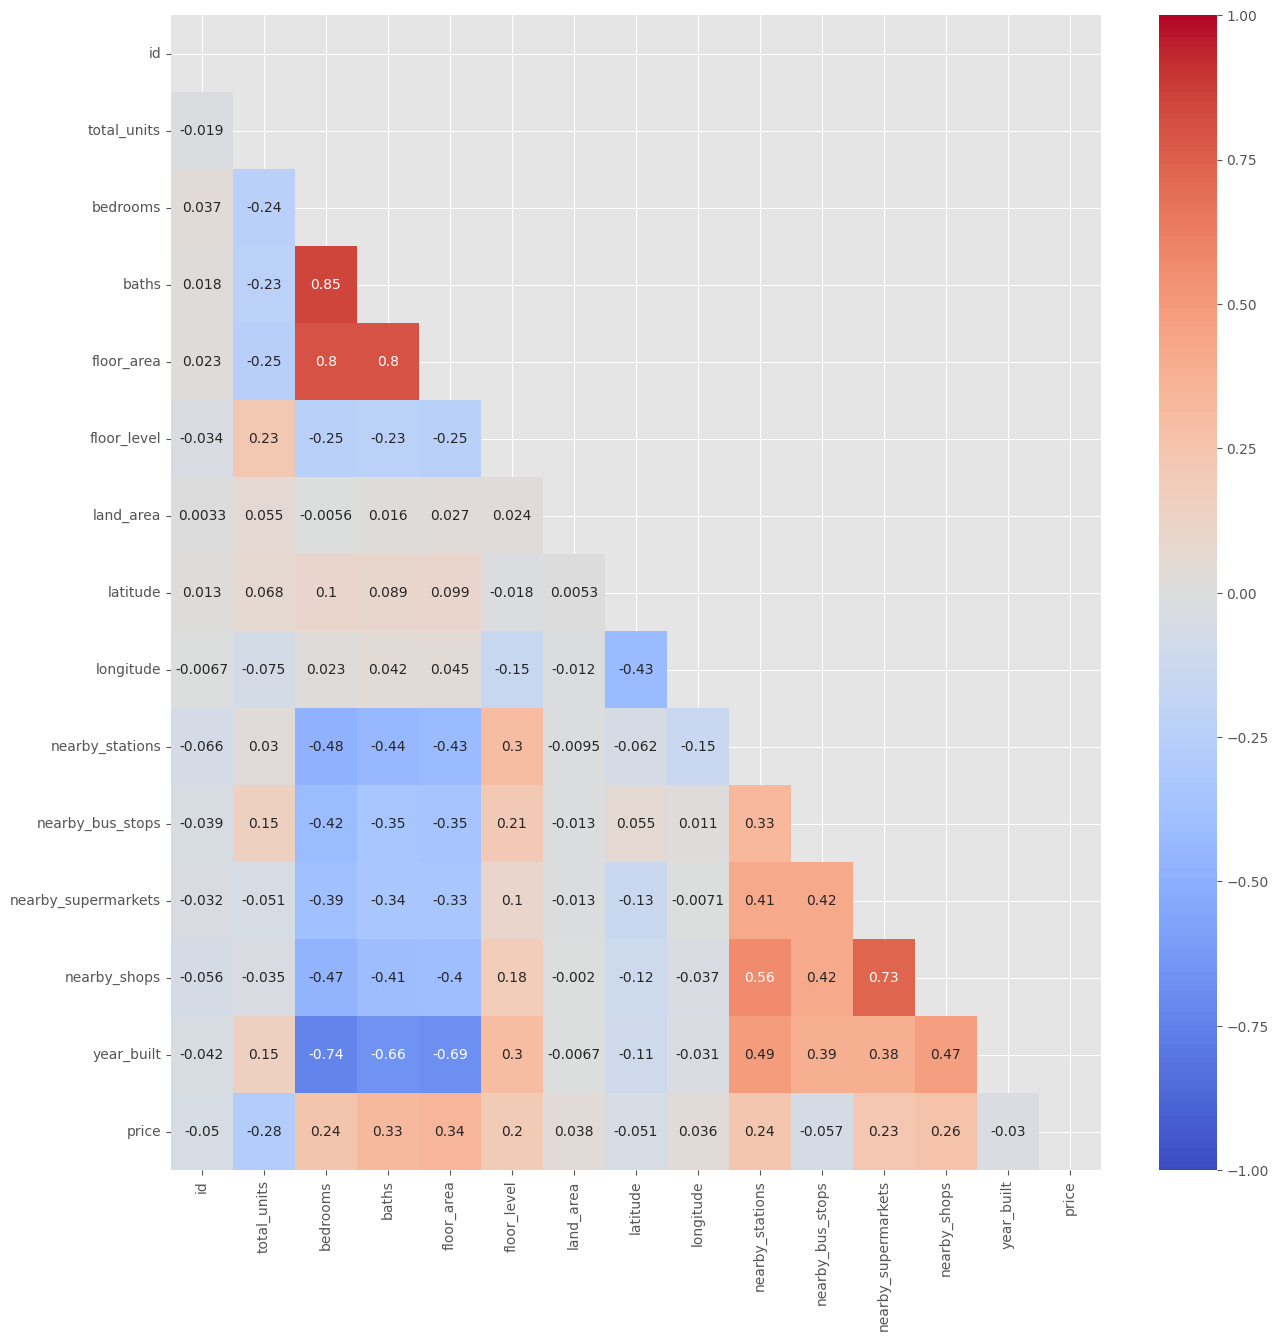

In [5]:
# Check correlation
plt.figure(figsize=(15,15))
mask = np.triu(np.ones_like(train_df.corr(numeric_only=True)), k=0)
sns.heatmap(train_df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, mask=mask, cmap='coolwarm');

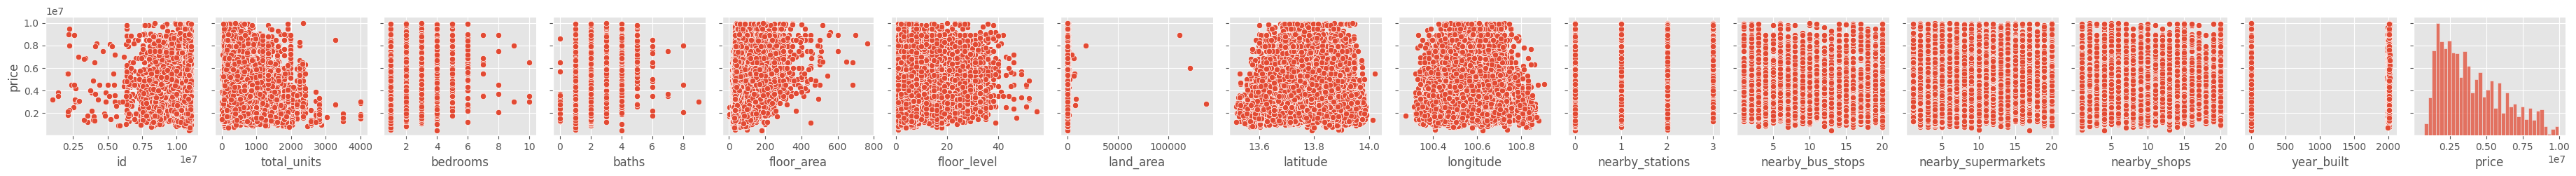

In [6]:
# Pairplot, for seeing features relationship with price
sns.pairplot(data=train_df._get_numeric_data(), y_vars='price');

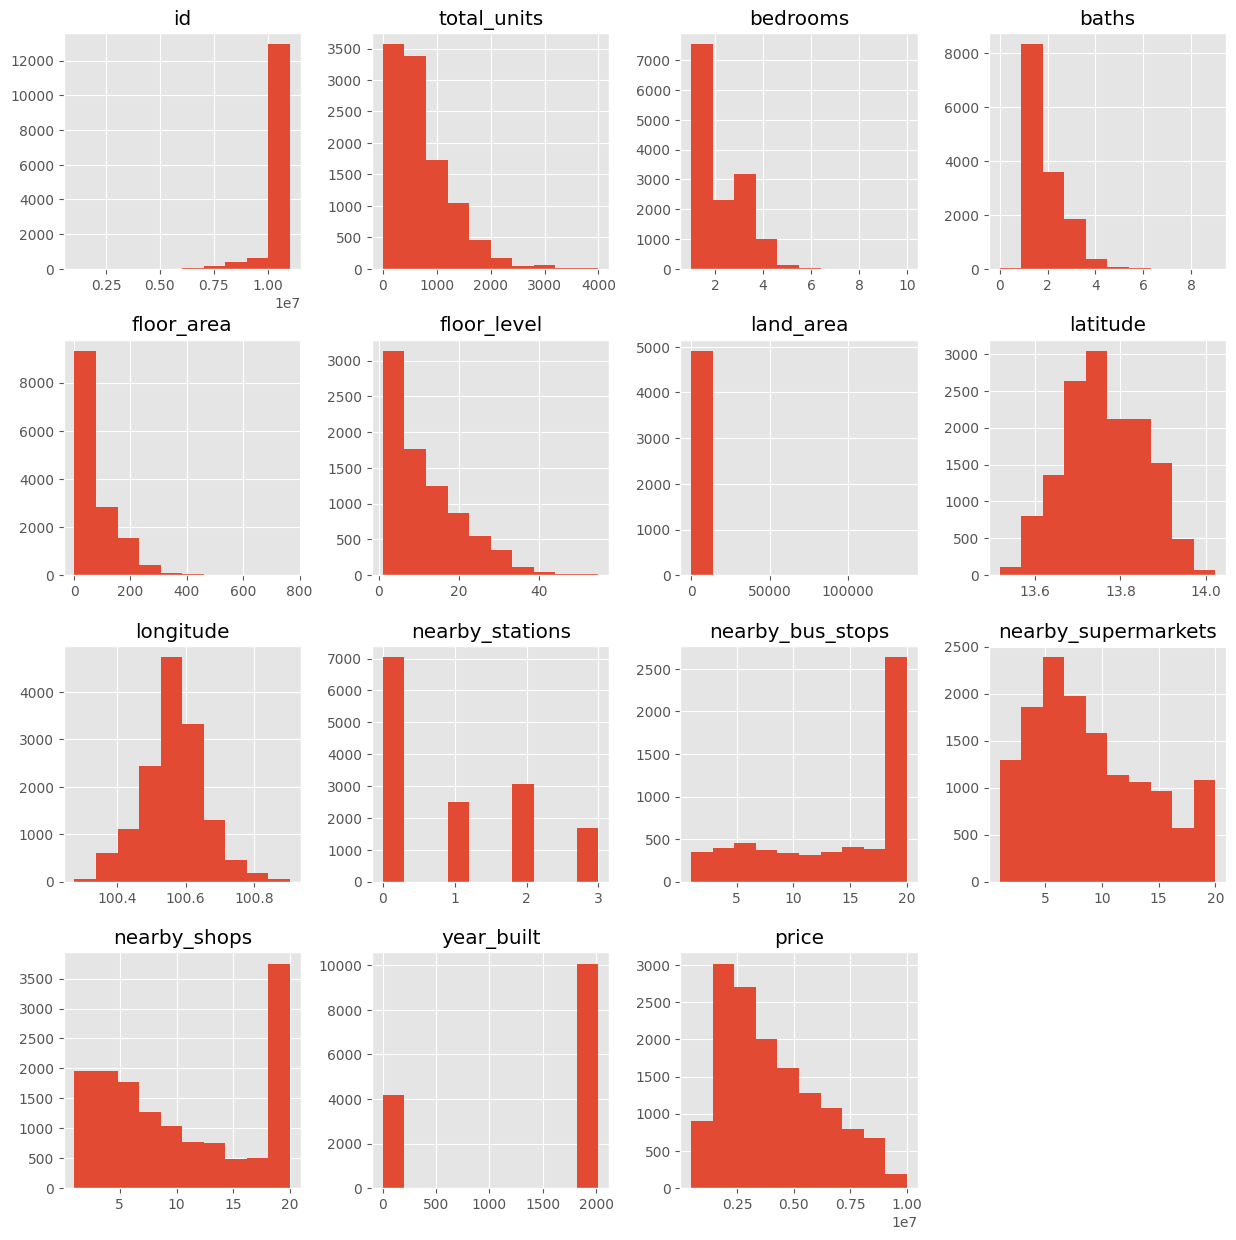

In [7]:
# Each feature distribution
train_df.hist(figsize=(15,15));

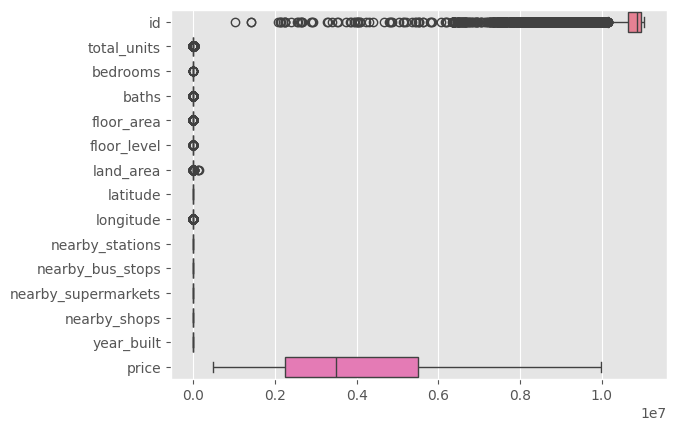

In [8]:
# Looking for outlier
sns.boxplot(train_df._get_numeric_data(), orient='h');

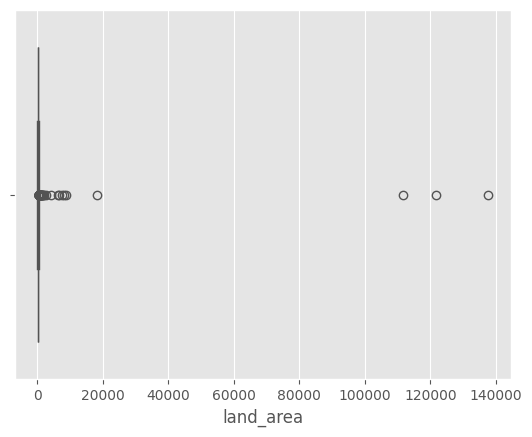

In [9]:
# Focused outlier on land_area
sns.boxplot(train_df[train_df['property_type'] != 'Condo']['land_area'], orient='h');

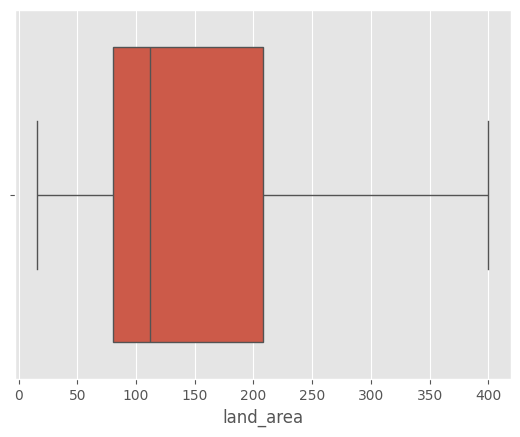

In [10]:
# Test dropping som outliers
sns.boxplot(train_df[(train_df['property_type'] != 'Condo') & (train_df['land_area'] <= 400)]['land_area'], orient='h');

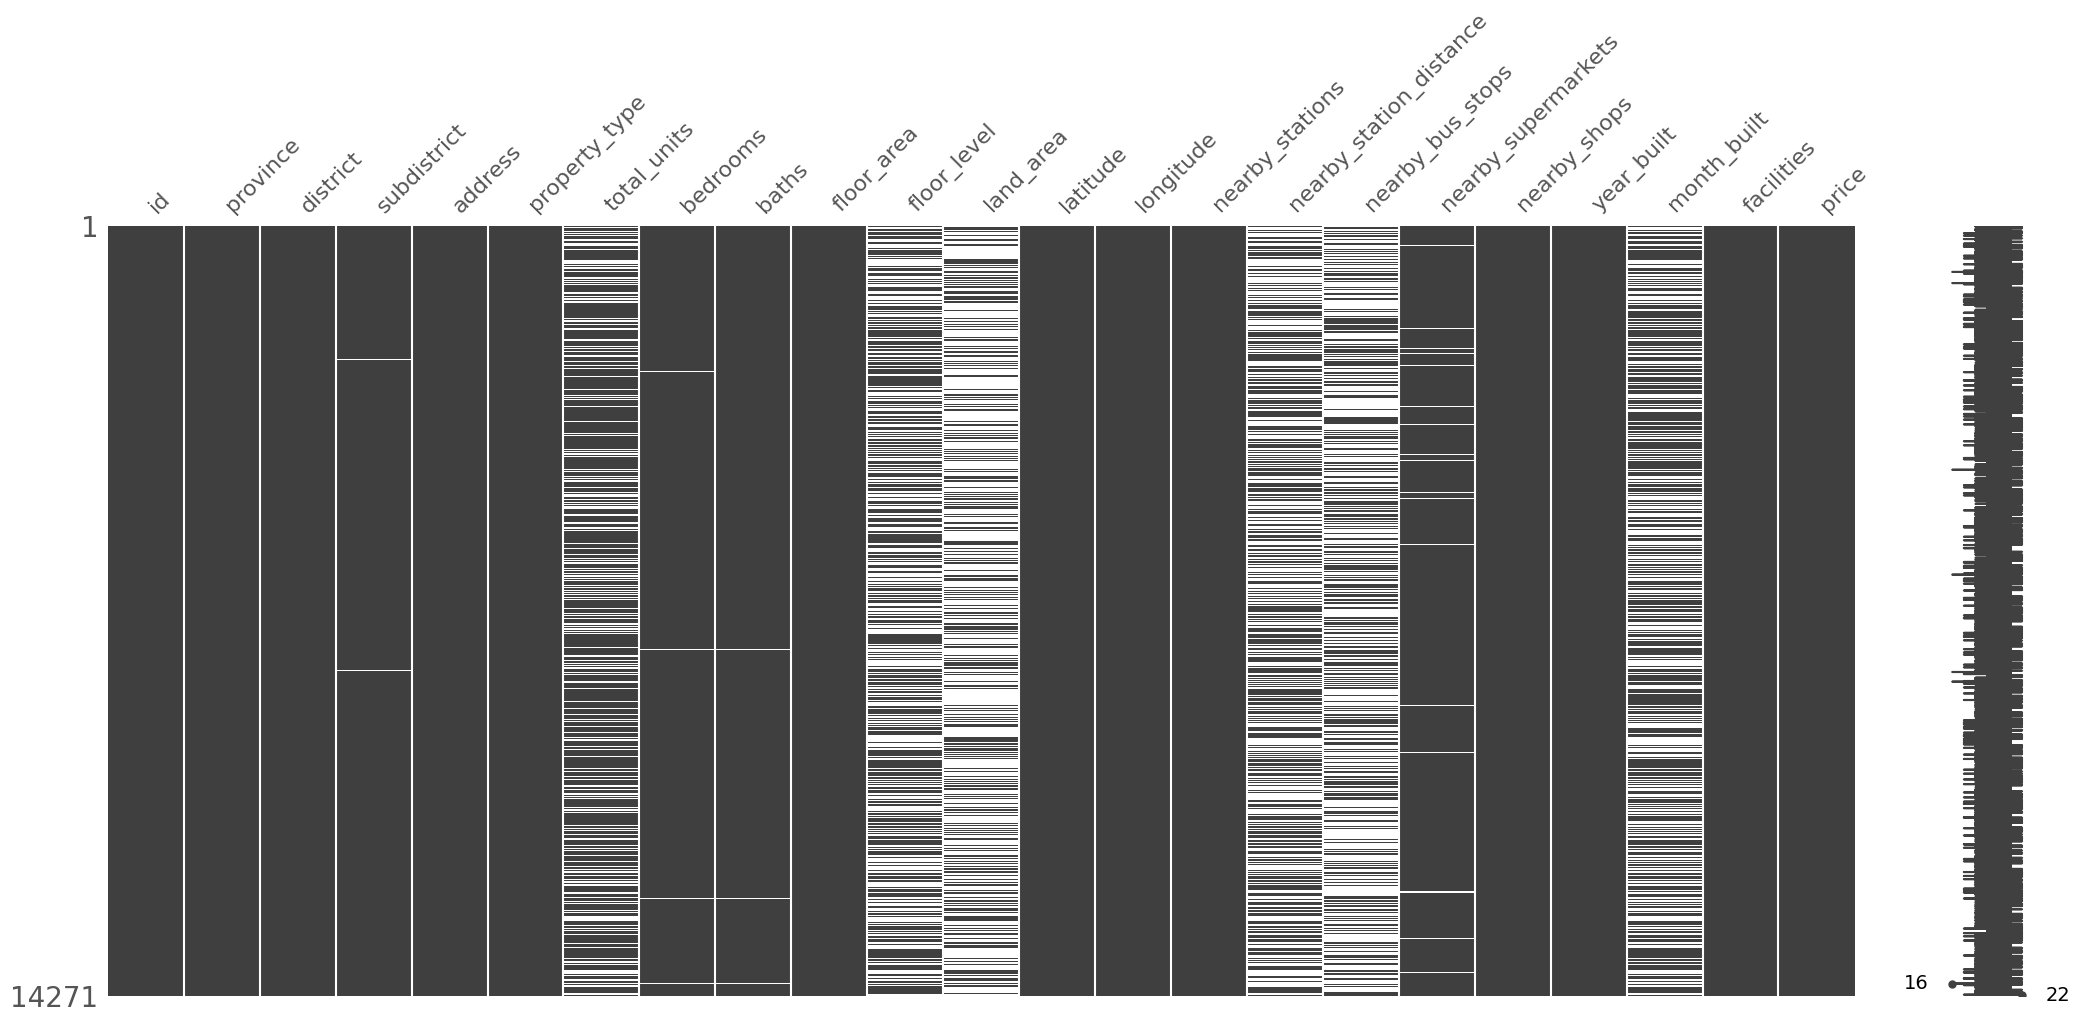

In [11]:
# Check for null values
msno.matrix(train_df);

In [12]:
# Check values of each column
for feature in train_df.columns:
    print(feature)
    try:
        print(train_df[feature].sort_values(ascending=False).unique())
    except:
        print(train_df[feature].astype(str).sort_values(ascending=False).unique())
    print('\n')

id
[11047896 11047889 11047888 ...  1422670  1421378  1025114]


province
['Samut Prakan' 'Nonthaburi' 'Bangkok']


district
['Yan Nawa' 'Watthana' 'Wang Thonglang' 'Thung Khru' 'Thon Buri'
 'Thawi Watthana' 'Taling Chan' 'Suan Luang' 'Sathon' 'Saphan Sung'
 'Sai Noi' 'Sai Mai' 'Ratchathewi' 'Rat Burana' 'Prawet'
 'Phra Samut Jadee' 'Phra Pradaeng' 'Phra Khanong' 'Phaya Thai'
 'Phasi Charoen' 'Pathum Wan' 'Pak Kret' 'Nong Khaem' 'Nong Chok'
 'Mueang Samut Prakan' 'Mueang Nonthaburi' 'Min Buri' 'Lat Phrao'
 'Lat Krabang' 'Lak Si' 'Khlong Toei' 'Khlong San' 'Khlong Sam Wa'
 'Khan Na Yao' 'Huai Khwang' 'Don Mueang' 'Din Daeng' 'Chom Thong'
 'Chatuchak' 'Bueng Kum' 'Bangkok Yai' 'Bangkok Noi' 'Bang Yai' 'Bang Sue'
 'Bang Sao Thong' 'Bang Rak' 'Bang Phli' 'Bang Phlat' 'Bang Na'
 'Bang Kruai' 'Bang Khun Thian' 'Bang Kho Laem' 'Bang Khen' 'Bang Khae'
 'Bang Kapi' 'Bang Bua Thong' 'Bang Bon' 'Bang Bo']


subdistrict
['Yan Nawa' 'Wong Sawang' 'Whizdom The Exclusive' 'Wat Tha Phra'
 'Wat Phraya 

In [13]:
# Check data types
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14271 entries, 0 to 14270
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       14271 non-null  int64  
 1   province                 14271 non-null  object 
 2   district                 14271 non-null  object 
 3   subdistrict              14260 non-null  object 
 4   address                  14271 non-null  object 
 5   property_type            14271 non-null  object 
 6   total_units              10509 non-null  float64
 7   bedrooms                 14228 non-null  float64
 8   baths                    14236 non-null  float64
 9   floor_area               14271 non-null  int64  
 10  floor_level              8093 non-null   float64
 11  land_area                4917 non-null   float64
 12  latitude                 14271 non-null  float64
 13  longitude                14271 non-null  float64
 14  nearby_stations       

In [14]:
# Check missing land_area for each property_type
train_df[train_df['land_area'].isna()]['property_type'].value_counts()

property_type
Condo             9206
Townhouse           93
Detached House      55
Name: count, dtype: int64

# Preprocessing

In [15]:
train_df_imputed = train_df.copy()

### Drop outliers in land_area

<Axes: ylabel='land_area'>

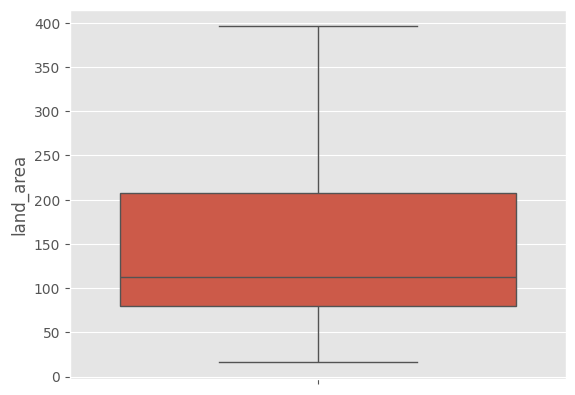

In [16]:
# Check logic
sns.boxplot(train_df_imputed[~((train_df_imputed['property_type'] != 'Condo') & (train_df_imputed['land_area'] >= 400))]['land_area'])

In [17]:
# Drop land_area outliers
train_df_imputed = train_df_imputed[~((train_df_imputed['property_type'] != 'Condo') & (train_df_imputed['land_area'] >= 400))]

### Drop null values in bedrooms and baths

In [18]:
train_df_imputed = train_df_imputed.loc[~(train_df_imputed['bedrooms'].isna()) & ~(train_df_imputed['baths'].isna())]
print(train_df_imputed.shape)
train_df_imputed[['bedrooms', 'baths']].isna().sum()

(14093, 23)


bedrooms    0
baths       0
dtype: int64

### Imputation

In [19]:
# Impute total_units with indicator
from sklearn.impute import KNNImputer, SimpleImputer

# Impute total_units with KNNImputer + indicator
knn_imp_total_units = KNNImputer(add_indicator=True)
col_imputed_with_ind = knn_imp_total_units.fit_transform(train_df_imputed[['total_units']])
train_df_imputed['total_units'] = col_imputed_with_ind[:,0]
train_df_imputed['total_units_missing'] = col_imputed_with_ind[:,1]

# Impute floor_level with KNNImputer + indicator
knn_imp_floor_level = KNNImputer(add_indicator=True)
col_imputed_with_ind = knn_imp_floor_level.fit_transform(train_df_imputed[['floor_level']])
train_df_imputed['floor_level'] = col_imputed_with_ind[:,0]
train_df_imputed['floor_level_missing'] = col_imputed_with_ind[:,1]

# Prepare model for imputing bedrooms, baths and nearby_supermarkets in test data, as null values of these columns are dropped in train data
knn_impute_null_value_dropped = KNNImputer()
knn_impute_null_value_dropped.fit(train_df_imputed[['bedrooms', 'baths', 'nearby_supermarkets']])

# Convert year_built = 0 to NaN and impute with KNNImputer + indicator
train_df_imputed['year_built'] = train_df_imputed['year_built'].map(lambda x: x if x != 0 else np.nan)

knn_imp_year_built = KNNImputer(add_indicator=True)
col_imputed_with_ind = knn_imp_year_built.fit_transform(train_df_imputed[['year_built']])
train_df_imputed['year_built'] = col_imputed_with_ind[:,0]
train_df_imputed['year_built_missing'] = col_imputed_with_ind[:,1]

# Impute land_area with missing indicator
s_imp_land_area = SimpleImputer(fill_value=0, add_indicator=True)
col_imputed_with_ind = s_imp_land_area.fit_transform(train_df_imputed[['land_area']])
train_df_imputed['land_area'] = col_imputed_with_ind[:,0]
train_df_imputed['land_area_missing'] = col_imputed_with_ind[:,1]

# Impute nearby_bus_stops
s_imp_nearby_bus_stops = SimpleImputer(fill_value=0, add_indicator=True)
col_imputed_with_ind = s_imp_nearby_bus_stops.fit_transform(train_df_imputed[['nearby_bus_stops']])
train_df_imputed['nearby_bus_stops'] = col_imputed_with_ind[:,0]
train_df_imputed['nearby_bus_stops_missing'] = col_imputed_with_ind[:,1]

print(train_df_imputed.shape)
train_df_imputed[['total_units', 'floor_level', 'year_built', 'land_area']].isna().sum()

(14093, 28)


total_units    0
floor_level    0
year_built     0
land_area      0
dtype: int64

### Drop null in nearby_supermarkets

In [20]:
train_df.shape

(14271, 23)

In [21]:
train_df_imputed = train_df_imputed.loc[~(train_df_imputed['nearby_supermarkets'].isna())]
print(train_df_imputed.shape)
train_df_imputed[['nearby_supermarkets']].isna().sum()

(13725, 28)


nearby_supermarkets    0
dtype: int64

### Transform

In [22]:
# Correcting and transform district and subdistrict
dist_subdist_replacement = pd.read_csv('../data/dist_subdist_replacement.csv')
replacement_dict = dist_subdist_replacement.set_index('dist_subdist')['replacement'].to_dict()

train_df_imputed['dist_subdist'] = train_df_imputed['district'] + '_' + train_df_imputed['subdistrict'].map(lambda x: '' if pd.isna(x) else x)
train_df_imputed['dist_subdist'] = train_df_imputed['dist_subdist'].replace(replacement_dict)

In [23]:
# Get list of nearby stations
station_list = set()
for row in train_df_imputed['nearby_station_distance']:
    try:
        for station in row:
            station_list.add(station[0])
    except:
        pass

station_list = list(station_list)

In [24]:
# Set inital value of station columns = 0
train_df_imputed = pd.concat([train_df_imputed, pd.DataFrame(0, index=train_df_imputed.index, columns=station_list)], axis=1)
train_df_imputed.head()

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,BL21 Phetchaburi MRT,N7 Saphan Kwai BTS,E13 Bang Na BTS,E8 Phra Khanong BTS,BL03 Fai Chai MRT,RW05 SRT Bang Bamru,E17 Chang Erawan BTS,BL38 Lak Song MRT,S11 Wutthakat BTS,RN03 SRT Wat Samian Nari
0,8448321,Bangkok,Watthana,Phra Khanong Nuea,"36 Soi Sukhumvit 63, Ekamai Road",Condo,273.000000,2.0,2.0,66,...,0,0,0,0,0,0,0,0,0,0
1,10936325,Bangkok,Watthana,Khlong Toei Nuea,31 สุขุมวิท,Condo,74.000000,1.0,1.0,49,...,0,0,0,0,0,0,0,0,0,0
2,10927931,Bangkok,Khlong Toei,Khlong Tan,"68 Sukhumvit 24 Alley, Khong Tan",Condo,940.000000,1.0,1.0,34,...,0,0,0,0,0,0,0,0,0,0
3,11004792,Nonthaburi,Bang Kruai,Bang Khun Kong,Bang Khun Kong,Detached House,713.055763,3.0,3.0,170,...,0,0,0,0,0,0,0,0,0,0
4,10757452,Nonthaburi,Mueang Nonthaburi,Bang Phai,พระราม5-นครอินทร์,Townhouse,713.055763,3.0,2.0,120,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Convert nearby_station_distance to columns
station_dist = []

def extract_and_convert_nearby_station_to_column(row):
    global station_dist
    try:
        for station in row['nearby_station_distance']:
            row[station[0]] = station[1]
            station_dist.append(station[1])
    except:
        pass

    return row

train_df_imputed = train_df_imputed.apply(extract_and_convert_nearby_station_to_column, axis=1)

# Normalize distance values
station_dist_mean = np.mean(station_dist)
station_dist_std = np.std(station_dist)
train_df_imputed[station_list] = train_df_imputed[station_list].map(lambda x: (x - station_dist_mean)/station_dist_std if x > 0 else 0)

train_df_imputed.head()

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,BL21 Phetchaburi MRT,N7 Saphan Kwai BTS,E13 Bang Na BTS,E8 Phra Khanong BTS,BL03 Fai Chai MRT,RW05 SRT Bang Bamru,E17 Chang Erawan BTS,BL38 Lak Song MRT,S11 Wutthakat BTS,RN03 SRT Wat Samian Nari
0,8448321,Bangkok,Watthana,Phra Khanong Nuea,"36 Soi Sukhumvit 63, Ekamai Road",Condo,273.000000,2.0,2.0,66,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10936325,Bangkok,Watthana,Khlong Toei Nuea,31 สุขุมวิท,Condo,74.000000,1.0,1.0,49,...,1.080022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10927931,Bangkok,Khlong Toei,Khlong Tan,"68 Sukhumvit 24 Alley, Khong Tan",Condo,940.000000,1.0,1.0,34,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11004792,Nonthaburi,Bang Kruai,Bang Khun Kong,Bang Khun Kong,Detached House,713.055763,3.0,3.0,170,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10757452,Nonthaburi,Mueang Nonthaburi,Bang Phai,พระราม5-นครอินทร์,Townhouse,713.055763,3.0,2.0,120,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Convert facilities column to facilities count
def extract_and_convert_facilities_to_column(row):
    count = 0
    try:
        facilities_list = row['facilities']
        for facility in facilities_list:
            count += 1
    except:
        pass
    row['facilities'] = count
    return row

train_df_imputed = train_df_imputed.apply(extract_and_convert_facilities_to_column, axis=1)
train_df_imputed.head()

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,BL21 Phetchaburi MRT,N7 Saphan Kwai BTS,E13 Bang Na BTS,E8 Phra Khanong BTS,BL03 Fai Chai MRT,RW05 SRT Bang Bamru,E17 Chang Erawan BTS,BL38 Lak Song MRT,S11 Wutthakat BTS,RN03 SRT Wat Samian Nari
0,8448321,Bangkok,Watthana,Phra Khanong Nuea,"36 Soi Sukhumvit 63, Ekamai Road",Condo,273.000000,2.0,2.0,66,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10936325,Bangkok,Watthana,Khlong Toei Nuea,31 สุขุมวิท,Condo,74.000000,1.0,1.0,49,...,1.080022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10927931,Bangkok,Khlong Toei,Khlong Tan,"68 Sukhumvit 24 Alley, Khong Tan",Condo,940.000000,1.0,1.0,34,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11004792,Nonthaburi,Bang Kruai,Bang Khun Kong,Bang Khun Kong,Detached House,713.055763,3.0,3.0,170,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10757452,Nonthaburi,Mueang Nonthaburi,Bang Phai,พระราม5-นครอินทร์,Townhouse,713.055763,3.0,2.0,120,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Dummified
original_columns = train_df_imputed.columns.tolist()
dummified_columns = ['dist_subdist', 'property_type']
train_df_imputed = pd.get_dummies(train_df_imputed, columns=dummified_columns, drop_first=True, dtype=int)

dummy_columns = list(set(train_df_imputed.columns.tolist()) - set(original_columns))

In [28]:
# Take log to floor_area, floor_level
train_df_imputed['floor_area'] = np.log(train_df_imputed['floor_area'])
train_df_imputed['floor_level'] = np.log(train_df_imputed['floor_level'])
train_df_imputed['land_area'] = np.log(train_df_imputed['land_area'] + 1e-10)

# Modelling

In [29]:
# Feature Selection
# poly_features = ['total_units', 'bedrooms', 'baths', 'floor_area', 'floor_level', 'nearby_stations', 'nearby_supermarkets', 'nearby_shops', 'year_built', 'facilities', 'land_area']
# exclude_features = ['price', 'id', 'address', 'province', 'district', 'subdistrict', 'dist_subdist', 'nearby_station_distance', 'nearby_bus_stops', 'month_built', 'property_type', 'latitude', 'longitude']
# poly_features = ['total_units', 'bedrooms', 'baths', 'floor_area', 'floor_level', 'nearby_stations', 'nearby_supermarkets', 'nearby_shops', 'year_built', 'facilities', 'latitude', 'longitude', 'land_area'] 
# exclude_features = ['price', 'id', 'address', 'province', 'district', 'subdistrict', 'dist_subdist', 'nearby_station_distance', 'month_built', 'property_type']
poly_features = ['total_units', 'bedrooms', 'baths', 'floor_area', 'floor_level', 'nearby_stations', 'nearby_supermarkets', 'nearby_shops', 'year_built', 'facilities', 'land_area'] # Best
exclude_features = ['price', 'id', 'address', 'province', 'district', 'subdistrict', 'dist_subdist', 'nearby_station_distance', 'month_built', 'property_type', 'latitude', 'longitude'] # Best
features = list(set(train_df_imputed.loc[:, ~(train_df_imputed.columns.isin(exclude_features)) & ~(train_df_imputed.columns.isin(poly_features))].columns) - set(dummy_columns) - set(station_list))

y = train_df_imputed['price'].reset_index(drop=True)
X = train_df_imputed[features].reset_index(drop=True)
X_poly = train_df_imputed[poly_features].reset_index(drop=True)
X_dummy = train_df_imputed[dummy_columns].reset_index(drop=True)
X_station_list = train_df_imputed[station_list].reset_index(drop=True)

X.dtypes.unique(), X_poly.dtypes.unique(), X_dummy.dtypes.unique(), X_station_list.dtypes.unique()

(array([dtype('float64')], dtype=object),
 array([dtype('float64'), dtype('int64')], dtype=object),
 array([dtype('int32')], dtype=object),
 array([dtype('float64')], dtype=object))

In [30]:
# Scale
ss_poly = StandardScaler()
X_scaled_poly = ss_poly.fit_transform(X_poly)

ss = StandardScaler()
X_scaled = ss.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=features)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_scaled_poly = poly.fit_transform(X_scaled_poly)
X_scaled_poly = pd.DataFrame(X_scaled_poly, columns=poly.get_feature_names_out(poly_features))

X_combined = pd.concat([X_scaled_poly, X_scaled, X_station_list, X_dummy], axis=1)

In [31]:
# Split
X_train, X_val, y_train, y_val = train_test_split(X_combined, y, train_size=0.875, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((12009, 438), (1716, 438), (12009,), (1716,))

In [32]:
# Create model
lr = LinearRegression()
ridge = RidgeCV(alphas=np.linspace(0.1, 10, 100))
lasso = LassoCV(n_alphas=100, max_iter=50000)

In [33]:
# Check Cross Val Score
cross_val_lr = cross_val_score(lr, X_combined, y, cv=5)
cross_val_ridge = cross_val_score(ridge, X_combined, y, cv=5)
cross_val_lasso = cross_val_score(lasso, X_combined, y, cv=5)

print('Lr =', cross_val_lr, '=', cross_val_lr.mean())
print('Ridge =', cross_val_ridge, '=', cross_val_ridge.mean())
print('Lasso =', cross_val_lasso, '=', cross_val_lasso.mean())

Lr = [0.78448192 0.8012527  0.79347287 0.79862261 0.79403578] = 0.7943731765723464
Ridge = [0.79657475 0.80224888 0.7950689  0.7997123  0.79624562] = 0.7979700908363897
Lasso = [0.7815004  0.78358657 0.78312846 0.7793089  0.78014705] = 0.7815342746080999


In [34]:
# Check Cross Val RMSE
from sklearn.metrics import make_scorer, mean_squared_error
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
print('Lr =', np.sqrt(-cross_val_score(lr, X_combined, y, cv=5, scoring=mse_scorer).mean()))
print('Ridge =', np.sqrt(-cross_val_score(ridge, X_combined, y, cv=5, scoring=mse_scorer).mean()))
print('Lasso =', np.sqrt(-cross_val_score(lasso, X_combined, y, cv=5, scoring=mse_scorer).mean()))

Lr = 979845.3352271746
Ridge = 971341.126891557
Lasso = 1010164.7602254065


In [35]:
# Train
lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

LassoCV(max_iter=50000)

In [36]:
# Validate
print('Linear train score:', lr.score(X_train, y_train))
print('Ridge train score:', ridge.score(X_train, y_train))
print('Lasso train score:', lasso.score(X_train, y_train))

print('Linear test score:', lr.score(X_val, y_val))
print('Ridge test score:', ridge.score(X_val, y_val))
print('Lasso test score:', lasso.score(X_val, y_val))

Linear train score: 0.8178471895754081
Ridge train score: 0.8168494340429223
Lasso train score: 0.7934324735018782
Linear test score: 0.794744172279597
Ridge test score: 0.7955140047241126
Lasso test score: 0.7759001635110139


In [37]:
# Check RMSE
lr_pred = lr.predict(X_val)
ridge_pred = ridge.predict(X_val)
lasso_pred = lasso.predict(X_val)

print('Lr =', np.sqrt(mean_squared_error(y_val, lr_pred)))
print('Ridge =', np.sqrt(mean_squared_error(y_val, ridge_pred)))
print('Lasso =', np.sqrt(mean_squared_error(y_val, lasso_pred)))

Lr = 953847.3331126383
Ridge = 952056.9029813217
Lasso = 996671.1593752909


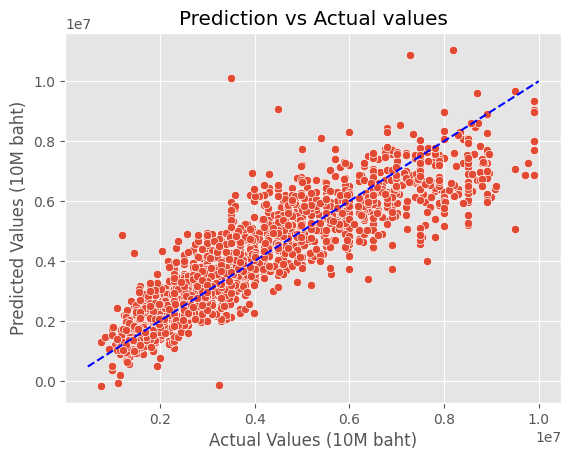

In [38]:
# Actual data vs prediction line
plt.title('Prediction vs Actual values')
y_val_pred = ridge.predict(X_val)
y_val_pred = pd.DataFrame(y_val_pred, columns=['prediction']).reset_index(drop=True)
y_val_df = pd.DataFrame(y_val).reset_index(drop=True)
plot_df = pd.concat([y_val_df, y_val_pred], axis=1)
sns.scatterplot(x=plot_df['price'], y=plot_df['prediction'])
plt.plot([min(y), max(y)], [min(y), max(y)], color='blue', linestyle='--')
plt.xlabel('Actual Values (10M baht)')
plt.ylabel('Predicted Values (10M baht)');

In [39]:
# Retrain before using it to predict test data
lr.fit(X_combined, y)
ridge.fit(X_combined, y)
lasso.fit(X_combined, y)

LassoCV(max_iter=50000)

In [40]:
# Check coef for inference
data_list = list(zip(list(poly.get_feature_names_out(poly_features)) + list(features) + list(station_list) + list(dummy_columns), lr.coef_))
sorted_coef_data = sorted(data_list, key=lambda item: item[1])[::-1]

for item in sorted_coef_data:
    if item[1] > 290000 and ((item[0] in poly_features) or (item[0] in features)):
        print(item[0], '=', item[1])

print('\n')

for item in sorted_coef_data:
    if item[1] > 300000 and item[0] in station_list:
        print(item[0], '=', item[1])

print('\n')

for item in sorted_coef_data:
    if item[1] > 300000 and item[0] in dummy_columns:
        print(item[0], '=', item[1])

floor_area = 1577772.2972124903
baths = 576303.5722041542
nearby_stations = 524797.6933566323
land_area = 455974.67897328956
year_built = 341530.92664303875
bedrooms = 296969.1728846198


BL11 Bang Sue MRT = 9898270.94298848
BL32 Itsaraphap MRT = 2045469.8136531871
S1 Rachadamri BTS = 1905179.0192625583
BL26 Silom MRT = 1839104.1748241081
RN02 SRT Chatuchak = 1352440.5514275718
S7 Krung Thon Buri BTS = 1294983.5593061205
G2 Charoen Nakhon BTS = 1097835.2713218569
N2 Phaya Thai BTS = 1065604.17157343
A7 Ratchaprarop Airport Link = 1056434.6319040782
BL28 Hua Lamphong MRT = 1041430.4654570468
G1/S7 Krung Thon Buri BTS = 1014583.2513761101
RN07 SRT Kan Kheha = 915945.0123567604
BL23 Queen Sirikit National Convention Centre MRT = 877805.6845347409
B10 Charoenrat BRT = 689860.5793146181
N16 11th Infantry Regiment BTS = 563090.5306497288
E11 Punnawithi BTS = 524040.98851996014
N24 Khu Khot BTS = 457930.4350181547
S8 Wongwian Yai BTS = 447581.166721758
A2 Lat Krabang Airport Link = 407698.577

# Prediction

### test_df Preparation

In [41]:
test_df = pd.read_json('../data/test.json')

### Imputation

In [42]:
# Impute total_units with indicator
col_imputed_with_ind = knn_imp_total_units.transform(test_df[['total_units']])
test_df['total_units'] = col_imputed_with_ind[:,0]
test_df['total_units_missing'] = col_imputed_with_ind[:,1]

# Impute floor_level using mean of each category
col_imputed_with_ind = knn_imp_floor_level.transform(test_df[['floor_level']])
test_df['floor_level'] = col_imputed_with_ind[:,0]
test_df['floor_level_missing'] = col_imputed_with_ind[:,1]

# Impute year_built = 0 with KNN impute
test_df['year_built'] = test_df['year_built'].map(lambda x: x if x != 0 else np.nan)

col_imputed_with_ind = knn_imp_year_built.transform(test_df[['year_built']])
test_df['year_built'] = col_imputed_with_ind[:,0]
test_df['year_built_missing'] = col_imputed_with_ind[:,1]

# Impute bedrooms, baths and nearby_supermarkets (null dropped in train data)
col_imputed_with_ind = knn_impute_null_value_dropped.transform(test_df[['bedrooms', 'baths', 'nearby_supermarkets']])
test_df['bedrooms'] = col_imputed_with_ind[:,0]
test_df['baths'] = col_imputed_with_ind[:,1]
test_df['nearby_supermarkets'] = col_imputed_with_ind[:,2]

# Impute land_area with missing indicator
col_imputed_with_ind = s_imp_land_area.transform(test_df[['land_area']])
test_df['land_area'] = col_imputed_with_ind[:,0]
test_df['land_area_missing'] = col_imputed_with_ind[:,1]

# Impute nearby_bus_stops with missing indicator
col_imputed_with_ind = s_imp_nearby_bus_stops.transform(test_df[['nearby_bus_stops']])
test_df['nearby_bus_stops'] = col_imputed_with_ind[:,0]
test_df['nearby_bus_stops_missing'] = col_imputed_with_ind[:,1]

### Transform

In [43]:
# Correcting and transform district and subdistrict
test_df['dist_subdist'] = test_df['district'] + '_' + test_df['subdistrict'].map(lambda x: '' if pd.isna(x) else x)
test_df['dist_subdist'] = test_df['dist_subdist'].replace(replacement_dict)

# Convert nearby_station_distance to columns
# Set inital value of station columns = 0
test_df = pd.concat([test_df, pd.DataFrame(0, index=test_df.index, columns=station_list)], axis=1)
test_df = test_df.apply(extract_and_convert_nearby_station_to_column, axis=1)
# Normalize distance values
test_df[station_list] = test_df[station_list].map(lambda x: (x - station_dist_mean)/station_dist_std if x > 0 else 0)

# Convert facilities to its count
test_df = test_df.apply(extract_and_convert_facilities_to_column, axis=1)

# Take log to floor_area, floor_level, land_area
test_df['floor_area'] = np.log(test_df['floor_area'])
test_df['floor_level'] = np.log(test_df['floor_level'])
test_df['land_area'] = np.log(test_df['land_area'])

# Dummified others
test_df = pd.get_dummies(test_df, columns=dummified_columns, drop_first=True, dtype=int)

### Run model & predict

In [44]:
# Align dataframe before prediction
test_df, _ = test_df.align(train_df_imputed, join='right', axis=1, fill_value=0)
test_df = pd.DataFrame(test_df)

In [45]:
# Copy features from trained model
X_test = test_df[features]
X_test_poly = test_df[poly_features]
X_test_dummy = test_df[dummy_columns]
X_test_station_list = test_df[station_list]

In [46]:
# Scale
X_test_poly_scaled = ss_poly.transform(X_test_poly)
X_test_scaled = ss.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=features)

X_test_poly_scaled = poly.transform(X_test_poly_scaled)
X_test_poly_scaled = pd.DataFrame(X_test_poly_scaled, columns=poly.get_feature_names_out(poly_features))

In [47]:
X_test_combined = pd.concat([X_test_poly_scaled, X_test_scaled, X_test_station_list, X_test_dummy], axis=1)
X_test_combined

,total_units,bedrooms,baths,floor_area,floor_level,nearby_stations,nearby_supermarkets,nearby_shops,year_built,facilities,...,dist_subdist_Pak Kret_Khlong Phra Udom,dist_subdist_Bang Bua Thong_Bang Rak Phatthana,dist_subdist_Bang Khae_Bang Khae,dist_subdist_Bangkok Noi_Arun Amarin,dist_subdist_Thon Buri_Bukkhalo,dist_subdist_Ratchathewi_Makkasan,dist_subdist_Sai Noi_Sai Noi,dist_subdist_Pathum Wan_Lumphini,dist_subdist_Bang Phlat_Bang O,dist_subdist_Bang Rak_Si Phraya
0,0.173763,2.019273,1.665163,1.018482,0.285526,-0.908299,-0.007812,-0.831452,0.007383,-0.105816,...,0,0,0,0,0,0,0,0,0,0
1,-1.268727,2.019273,1.665163,1.642297,0.285526,-0.908299,-0.007812,-0.831452,1.481478,-0.105816,...,0,0,0,0,0,0,0,0,0,0
2,-0.590153,-0.782815,-0.687682,-1.338727,1.245955,1.844679,0.739391,1.342395,0.097421,-0.339007,...,0,0,0,0,0,0,0,0,0,0
3,-0.125975,-0.782815,-0.687682,-0.473725,-0.830955,0.009360,1.299793,1.342395,-0.456202,-0.105816,...,0,0,0,0,0,0,0,0,0,0
4,1.543400,-0.782815,-0.687682,-0.954874,1.359434,-0.908299,0.178989,0.472856,-0.733013,-0.339007,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1.834812,-0.782815,-0.687682,-0.775335,0.360528,0.927020,1.673395,1.342395,0.374232,1.293335,...,0,0,0,0,0,0,0,0,0,0
2496,-0.465262,-0.782815,-0.687682,0.166576,1.737282,1.844679,2.046997,1.342395,-1.563448,-0.105816,...,0,0,0,0,0,0,0,0,0,0
2497,0.841929,-0.782815,-0.687682,-0.440241,0.112394,0.009360,-0.755016,-0.541606,-1.563448,0.593760,...,0,0,0,0,0,0,0,0,0,0
2498,0.005160,-0.782815,-0.687682,-1.003634,-0.191296,0.009360,0.739391,1.342395,0.374232,-0.105816,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# predict
y_pred = ridge.predict(X_test_combined)

In [49]:
# Result df
result_df = pd.concat([test_df['id'], pd.DataFrame(y_pred)], axis=1)
result_df.columns = ['id', 'price']
result_df

,id,price
0,10317868,4.578543e+06
1,10885829,6.547564e+06
2,10765951,2.972957e+06
3,10003549,6.167522e+06
4,10663026,1.912732e+06
...,...,...
2495,10889363,5.435126e+06
2496,10975839,8.479741e+06
2497,10986832,2.522532e+06
2498,10687627,1.802941e+06


In [50]:
result_df.to_csv('../data/submission.csv', index=False)

### Kaggle Score

![Kaggle Score](../image/Final_model_kaggle_score.png)